In [1]:
import pandas as pd   
from sklearn.metrics.pairwise import cosine_similarity 

In [2]:
orders = pd.read_csv('data/orders.csv' )
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
print(order_products_prior.shape)
print(order_products_train.shape)
print(orders.shape)
print(aisles.shape)
print(departments.shape)
print(products.shape)

(32434489, 4)
(1384617, 4)
(3421083, 7)
(134, 2)
(21, 2)
(49688, 4)


In [8]:
# Concat order_products_prior and train together to get a total list of ordered products
order_products_total = pd.concat([order_products_prior, order_products_train])

print('there are', order_products_total.shape[0], 'number of products have been ordered')

there are 33819106 number of products have been ordered


In [9]:
order_products_total.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
# Merge order_products_total with products to get product names
order_products_total = order_products_total.drop('add_to_cart_order', axis = 1)
order_products_total = order_products_total.merge(products[['product_id', 'product_name']],how='left', on='product_id')
order_products_total.head()

,order_id,product_id,reordered,product_name
0,2,33120,1,Organic Egg Whites
1,2,28985,1,Michigan Organic Kale
2,2,9327,0,Garlic Powder
3,2,45918,1,Coconut Butter
4,2,30035,0,Natural Sweetener


In [11]:
# Get the list of orders that have been reordered before
reorders = order_products_total[order_products_total['reordered'] == 1]
reorders.shape

(19955360, 4)

In [12]:
orders2 = orders[['order_id', 'user_id']]
orders2

,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1
...,...,...
3421078,2266710,206209
3421079,1854736,206209
3421080,626363,206209
3421081,2977660,206209


In [13]:
# merge to get user_id and product_id
user_orders = reorders.merge(orders2, on='order_id')
user_orders

,order_id,product_id,reordered,product_name,user_id
0,2,33120,1,Organic Egg Whites,202279
1,2,28985,1,Michigan Organic Kale,202279
2,2,45918,1,Coconut Butter,202279
3,2,17794,1,Carrots,202279
4,2,40141,1,Original Unflavored Gelatine Mix,202279
...,...,...,...,...,...
19955355,3421063,14233,1,Natural Artesian Water,169679
19955356,3421063,35548,1,Twice Baked Potatoes,169679
19955357,3421070,35951,1,Organic Unsweetened Almond Milk,139822
19955358,3421070,16953,1,Creamy Peanut Butter,139822


In [14]:
# filtering out the high volumn products that user reordered more than once
user_orders['high_volume'] = (user_orders['product_id'].value_counts().sort_values(ascending=False)>1)
high_volume = user_orders[user_orders['high_volume'] == True]
high_volume

,order_id,product_id,reordered,product_name,user_id,high_volume
1,2,28985,1,Michigan Organic Kale,202279,True
2,2,45918,1,Coconut Butter,202279,True
3,2,17794,1,Carrots,202279,True
4,2,40141,1,Original Unflavored Gelatine Mix,202279,True
5,2,1819,1,All Natural No Stir Creamy Almond Butter,202279,True
...,...,...,...,...,...,...
49683,8861,27104,1,Fresh Cauliflower,97865,True
49685,8861,21709,1,Sparkling Lemon Water,97865,True
49686,8861,20119,1,Sparkling Water Berry,97865,True
49687,8861,28204,1,Organic Fuji Apple,97865,True


In [15]:
# get a matrix of different high volume items that particular user purchased
high_volume_users = high_volume.groupby(['user_id', 'product_name']).size().sort_values(ascending=False).unstack().fillna(0)
high_volume_users

product_name,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",0% Milkfat Greek Yogurt Honey,1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,...,"Zucchini, Spinach & Banana Blend Veggies On-The-Go Stage 2 (6 Months and Up)",from Concentrate Mango Nectar,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
high_volume_users.iloc[100]

product_name
0% Fat Blueberry Greek Yogurt                              0.0
0% Fat Free Organic Milk                                   0.0
0% Fat Organic Greek Vanilla Yogurt                        0.0
0% Greek Strained Yogurt                                   0.0
0% Greek Yogurt Black Cherry on the Bottom                 0.0
                                                          ... 
vitaminwater® XXX Acai Blueberry Pomegranate               0.0
with Crispy Almonds Cereal                                 0.0
with Olive Oil Mayonnaise Dressing                         0.0
with Xylitol Cinnamon 18 Sticks Sugar Free Gum             0.0
with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum    0.0
Name: 3597, Length: 9314, dtype: float64

In [17]:
import numpy as np
np.max(high_volume_users['0% Fat Blueberry Greek Yogurt'])

1.0

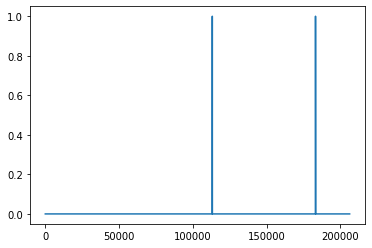

In [18]:
import matplotlib.pyplot as plt
plt.plot(high_volume_users['0% Fat Blueberry Greek Yogurt'])

In [19]:
# calculate similarity between each user
cosine_dists = pd.DataFrame(cosine_similarity(high_volume_users),index=high_volume_users.index, columns=high_volume_users.index)

In [20]:
cosine_dists

user_id,27,66,90,150,155,206,208,214,222,382,...,205908,205943,205970,205990,206043,206082,206105,206158,206162,206206
user_id,,,,,,,,,,,,,,,,,,,,,
27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.176777,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096225,0.0,0.0,...,0.0,0.166667,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
206105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
206158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:

def recommender_system(user_id):
    
    '''
    enter user_id and return a list of 5 recommendations.
    '''
    
    u = high_volume.groupby(['user_id','product_name']).size().sort_values(ascending=False).unstack().fillna(0)
    u_sim = pd.DataFrame(cosine_similarity(u), index=u.index, columns=u.index)

    p = high_volume.groupby(['product_name','user_id']).size().sort_values(ascending=False).unstack().fillna(0)
    
    recommendations = pd.Series(np.dot(p.values,cosine_dists[user_id]), index=p.index)
    return recommendations.sort_values(ascending=False).head(10)

In [22]:
recommender_system(91397)

product_name
Bag of Organic Bananas                  132.579424
Organic Whole Milk                       44.788580
Limes                                    36.012075
Organic Large Extra Fancy Fuji Apple     23.582827
Organic Hass Avocado                     20.269398
Organic Strawberries                     19.086184
Organic Baby Spinach                     18.176882
Banana                                   16.670350
Organic Raspberries                      13.136342
Organic Avocado                          11.330876
dtype: float64

In [23]:
idx = high_volume['user_id'] == 91397
high_volume[idx]

,order_id,product_id,reordered,product_name,user_id,high_volume
29767,5253,43504,1,Organic Chicken Strips,91397,True
29768,5253,27845,1,Organic Whole Milk,91397,True
29769,5253,19057,1,Organic Large Extra Fancy Fuji Apple,91397,True
29770,5253,26209,1,Limes,91397,True
29772,5253,13176,1,Bag of Organic Bananas,91397,True
29774,5253,42445,1,Organic Plain Whole Milk Yogurt,91397,True
